In [193]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#defino funcion generica para cargar CSV
def load_csv(path, nrows=None):
    df = pd.read_csv(path, nrows=nrows)
    return df

In [194]:
#Cargo Flight.csv e imprimo las columnas
df_flight = load_csv(r"C:\Users\elaru\OneDrive\Desktop\modulo 3\Customer Flight Activity.csv")
print(df_flight.columns)



Index(['Loyalty Number', 'Year', 'Month', 'Flights Booked',
       'Flights with Companions', 'Total Flights', 'Distance',
       'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed'],
      dtype='object')


In [ ]:
#funcion pre_eda. calidad y validacion de datos antes del EDA

def pre_eda(df: pd.DataFrame, name: str = "df"): #una funcion pre-Eda que recibe un dataframe y lo llama df.
    rep = {} #defnine un diccionario donde iran guardando losresuktados del preEda.


    dfc = df.copy()# se crea una copia del dataframe para no trabajar sobre el original.

    # Normaliza columnas
    rep["cols_original"] = list(dfc.columns)#Guarda el nombre de las columnas.Normaliza el texto.Convierte a minuscula,quita espacios,
                                            #cambia los espacios por guiones bajos y eliminia cualquier caracter raro con regex)
    dfc.columns = (
        dfc.columns.str.strip().str.lower()
        .str.replace(" ", "_", regex=True)
        .str.replace("[^0-9a-z_]", "", regex=True)
    )
    rep["cols_limpias"] = list(dfc.columns) #guarda los nombres ya limpios

 
    rep["shape"] = dfc.shape #devuelve funciones basicas de pandas. Devuelve el tamaño y el tipo de dato de cada columna.
    rep["dtypes"] = dfc.dtypes

  
    rep["nulos_top"] = dfc.isnull().sum().sort_values(ascending=False).head(10) #saca los nulos y los duplicados.
    rep["duplicados"] = int(dfc.duplicated().sum())

    # === Print ordenado ===
    print(f"\n== {name.upper()} ==") #Esto es solo para quede bonito en Mayuscula.
    print(f"shape: {rep['shape']}\n")

    print("tipos:")
    print(rep["dtypes"].to_string())#el tipo,nulos,duplicados en texto plano para que no se corte 

    print("\nnulos (top):")
    print(rep["nulos_top"].to_string())

    print(f"\nDuplicados totales: {rep['duplicados']}")

    return dfc #devuelve en un dataframe limpio 


In [197]:
df_flight_clean = pre_eda(df_flight, "flight")



== FLIGHT ==
shape: (405624, 10)

tipos:
loyalty_number                   int64
year                             int64
month                            int64
flights_booked                   int64
flights_with_companions          int64
total_flights                    int64
distance                         int64
points_accumulated             float64
points_redeemed                  int64
dollar_cost_points_redeemed      int64

nulos (top):
loyalty_number                 0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0

Duplicados totales: 1864


Customer Flight Activity contiene 405.624 registros y 10 columnas. Los tipos de datos son correctos (identificador, variables temporales en formato numérico y métricas de vuelos y puntos como enteros o decimales). No se detectan valores nulos en ninguna columna. Se identifican 1.864 registros duplicados, que deben analizarse con detalle: algunos pueden ser copias exactas eliminables y otros múltiples registros válidos de un mismo cliente en un mismo mes. En general, el dataset se encuentra en buen estado para continuar con el análisis exploratorio.

In [ ]:
df_flight_clean.describe() #para ver los rangos y el resumen estadistico. 

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
count,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000,405624.000000
mean,550037.873084,2017.500000,6.500000,4.115052,1.031805,5.146858,1208.880059,123.692721,30.696872,2.484503
std,258935.286969,0.500001,3.452057,5.225518,2.076869,6.521227,1433.155320,146.599831,125.486049,10.150038
min,100018.000000,2017.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2017.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2017.500000,6.500000,1.000000,0.000000,1.000000,488.000000,50.000000,0.000000,0.000000
75%,772194.000000,2018.000000,9.250000,8.000000,1.000000,10.000000,2336.000000,239.000000,0.000000,0.000000
max,999986.000000,2018.000000,12.000000,21.000000,11.000000,32.000000,6293.000000,676.500000,876.000000,71.000000


El análisis del describe() muestra que las variables temporales (year, month) son correctas y abarcan de 2016 a 2018, mientras que en varias columnas aparecen muchos valores en cero que reflejan clientes inactivos. La mayoría de los clientes reserva pocos vuelos, viaja solo y acumula o canjea pocos puntos, aunque existen outliers como clientes con más de 20 reservas, hasta 11 acompañantes, distancias de más de 6.000 y redenciones o acumulaciones de puntos muy altas; estos valores no parecen errores, sino casos de clientes muy activos, pero conviene tenerlos en cuenta porque afectan a medias y dispersión en los análisis.




### Customer Flight Analysis.csv
**Loyalty Number:** Este atributo representa un identificador único para cada cliente dentro del programa de lealtad de la aerolínea. Cada número de lealtad corresponde a un cliente específico.
- **Year:** Indica el año en el cual se registraron las actividades de vuelo para el cliente.
- **Month:** Representa el mes del año (de 1 a 12) en el cual ocurrieron las actividades de vuelo.
- **Flights Booked:** Número total de vuelos reservados por el cliente en ese mes específico.
- **Flights with Companions:** Número de vuelos reservados en los cuales el cliente viajó con acompañantes.
- **Total Flights:** El número total de vuelos que el cliente ha realizado.
- **Distance:** La distancia total (presumiblemente en millas o kilómetros) que el cliente ha volado durante el mes.
- **Points Accumulated:** Puntos acumulados por el cliente en el programa de lealtad durante el mes, con base en la distancia volada u otros factores.
- **Points Redeemed:** Puntos que el cliente ha canjeado en el mes, posiblemente para obtener beneficios como vuelos gratis, mejoras, etc.
- **Dollar Cost Points Redeemed:** El valor en dólares de los puntos que el cliente ha redimido durante el mes.

 


In [ ]:
df_flight_clean.head(20)#Para echar un vistazo rapido a los datos,devuelve por defecto 5 filas.

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
5,100301,2017,1,0,0,0,0,0.0,0,0
6,100364,2017,1,0,0,0,0,0.0,0,0
7,100380,2017,1,0,0,0,0,0.0,0,0
8,100428,2017,1,6,0,6,606,60.0,0,0
9,100504,2017,1,0,0,0,0,0.0,0,0


El preEDA da duplicados asi que sospecho que la clave primaria del cliente ("loyalty_number") no esta siendo unica. Los datos muestran muchos cero vuelos en varios periodos, lo que indica inactividad frecuente, mientras que otros acumulan puntos en función de la distancia recorrida. La variable (points_accumulated) presenta valores altos en comparación con (points_redeemed), confirmando que la mayoría de los clientes no canjea puntos y solo unos pocos generan costes en dólares. Además, se observa que la columna total_flights es coherente con la suma de vuelos reservados y vuelos con acompañantes lo que respalda la consistencia de los datos.

Comparo las columnas (loyalty_number,"year","month") .Necesitaba comprobar si se trataba de registros repetidos o de múltiples actividades del mismo cliente en distintos periodos de tiempo.

In [204]:
print(df_flight_clean["year"].unique()) #Años y meses distintos que aparecen
print(df_flight_clean["month"].unique())


[2017 2018]
[ 1  9  2  3 11  4  5  7  6  8 10 12]


In [149]:
duplicados = df_flight_clean.duplicated(subset=["loyalty_number","year","month"]).sum()
print("Duplicados cliente/año/mes:", duplicados)

# registros por cliente
print(df_flight_clean["loyalty_number"].value_counts().describe())


Duplicados cliente/año/mes: 3936
count    16737.000000
mean        24.235168
std          2.378631
min         24.000000
25%         24.000000
50%         24.000000
75%         24.000000
max         72.000000
Name: count, dtype: float64


La mayoría de los clientes tiene 24 registros (uno por mes en los dos años analizados). Sin embargo, existen casos con más de 24 registros por cliente (hasta 72), lo que indica entradas duplicadas de un mismo cliente en ciertos meses y no errores de clave primaria.

In [ ]:

duplicados_rows = df_flight_clean[df_flight_clean.duplicated(subset=["loyalty_number", "year", "month"], keep=False)]

# Ver los primeros duplicados
print(duplicados_rows.head(10))


     loyalty_number  year  month  flights_booked  flights_with_companions  \
41           101902  2017      1               0                        0   
42           101902  2017      1               0                        0   
114          106001  2017      1               9                        4   
115          106001  2017      1               5                        0   
226          112142  2017      1               0                        0   
227          112142  2017      1               0                        0   
275          114414  2017      1               8                        4   
276          114414  2017      1               1                        1   
477          126100  2017      1               0                        0   
478          126100  2017      1               0                        0   

     total_flights  distance  points_accumulated  points_redeemed  \
41               0         0                 0.0                0   
42            

(loyalty_number)
Un mismo cliente aparece varias veces en el mismo año y el mismo mes.
Pero las otras columnas (flights_booked, distance, etc.) tienen valores distintos en cada fila.
Es decir no son duplicados iguales (no es un error de duplicado).
Son registros distintos del mismo cliente en el mismo mes (quizá viajó varias veces).
Entonces:
No se pueden borrar, porque perdería información.

In [151]:
# 1) Agrupa por cliente/año/mes
df_flight_grouped = (#ahora loyalty number es una PK compuesta.
    df_flight_clean
        .groupby(["loyalty_number", "year", "month"], as_index=False) #escribir por que agrupe y que se cambia el nomobre del data frame porque ahora hay dos.
        .sum(numeric_only=True)
)

# 2) Pasa el PRE-EDA sobre el AGRUPADO (no sobre df_flight)
df_flight_grouped = pre_eda(df_flight_grouped, "flight_grouped")




== FLIGHT_GROUPED ==
shape: (401688, 10)

tipos:
loyalty_number                   int64
year                             int64
month                            int64
flights_booked                   int64
flights_with_companions          int64
total_flights                    int64
distance                         int64
points_accumulated             float64
points_redeemed                  int64
dollar_cost_points_redeemed      int64

nulos (top):
loyalty_number                 0
year                           0
month                          0
flights_booked                 0
flights_with_companions        0
total_flights                  0
distance                       0
points_accumulated             0
points_redeemed                0
dollar_cost_points_redeemed    0

Duplicados totales: 0


La columna loyalty_number funciona como identificador de cliente. Combinada con year y month forma la clave primaria del dataset agrupado. No tiene nulos ni duplicados, y está en formato int64, por lo que no requiere limpieza adicional.
El DataFrame original contenía varios registros de un mismo cliente dentro del mismo año y mes, por lo que lo agrupé por cliente/año/mes para consolidar la información y evitar duplicaciones en los análisis. A partir de esta agrupación generé un nuevo DataFrame llamado df_flight_grouped, distinto al DataFrame original, de manera que trabajo con ambos según convenga: el inicial conserva el detalle de cada vuelo, mientras que el agrupado resume la actividad mensual de cada cliente y facilita el análisis exploratorio.

In [152]:
# Revisar nulos en year
print("Nulos en year:", df_flight_grouped["year"].isnull().sum())

# Valores únicos ordenados
print("Valores únicos en year:", sorted(df_flight_grouped["year"].unique()))

# Rango de años
print("Mínimo:", df_flight_grouped["year"].min(), 
      "Máximo:", df_flight_grouped["year"].max())


Nulos en year: 0
Valores únicos en year: [np.int64(2017), np.int64(2018)]
Mínimo: 2017 Máximo: 2018


La columna year está completa, sin nulos ni valores inconsistentes. Solo incluye los años 2017 y 2018, lo cual es coherente con el periodo temporal del dataset. No necesita limpieza adicional.

In [153]:
# Revisar nulos en month
print("Nulos en month:", df_flight_grouped["month"].isnull().sum())

# Valores únicos ordenados
print("Valores únicos en month:", sorted(df_flight_grouped["month"].unique()))

# Rango de meses
print("Mínimo:", df_flight_grouped["month"].min(), 
      "Máximo:", df_flight_grouped["month"].max())


Nulos en month: 0
Valores únicos en month: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12)]
Mínimo: 1 Máximo: 12


La columna month está completa, sin nulos ni valores atípicos. Los valores van de 1 a 12, lo que corresponde correctamente a los meses del año. No requiere limpieza adicional.

In [154]:
# Revisar nulos en flights_booked
print("Nulos en flights_booked:", df_flight_grouped["flights_booked"].isnull().sum())

# Revisar valores negativos
print("Negativos en flights_booked:", (df_flight_grouped["flights_booked"] < 0).sum())

# Estadísticas básicas
print(df_flight_grouped["flights_booked"].describe())


Nulos en flights_booked: 0
Negativos en flights_booked: 0
count    401688.000000
mean          4.155374
std           5.269271
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max          39.000000
Name: flights_booked, dtype: float64


La columna flights_booked no presenta valores nulos ni negativos. Los valores van de 0 a 39, lo cual refleja la cantidad de vuelos reservados en un mes por cliente. La distribución es razonable: la mayoría reserva entre 2 y 5 vuelos al mes, aunque existen clientes con valores más altos (hasta 39), que se interpretan como clientes muy frecuentes. No requiere limpieza adicional.

In [155]:
# Reviso nulos
print("Nulos en flights_with_companions:", df_flight_grouped["flights_with_companions"].isnull().sum())

# Revisar valores negativos
print("Negativos en flights_with_companions:", (df_flight_grouped["flights_with_companions"] < 0).sum())

# Estadísticas básicas
print(df_flight_grouped["flights_with_companions"].describe())


Nulos en flights_with_companions: 0
Negativos en flights_with_companions: 0
count    401688.000000
mean          1.041916
std           2.090835
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: flights_with_companions, dtype: float64


La columna flights_with_companions no presenta valores nulos ni negativos. Los valores van de 0 a 20, lo que refleja cuántos vuelos realizó el cliente acompañado en un mes. La mayoría de clientes viaja solo, pero algunos registran vuelos con varios acompañantes (outliers hasta 20). No se requiere limpieza adicional, aunque conviene tener en cuenta este sesgo en los análisis. Evitar histograma mostrar mejor con countplot.

In [156]:
#Añadí una columna llamada Date   
df_flight_grouped["date"] = pd.to_datetime({
    "year":  df_flight_grouped["year"],
    "month": df_flight_grouped["month"],
    "day":   1
})


In [157]:
df_flight_grouped[["year","month","date"]].head()

,year,month,date
0,2017,1,2017-01-01
1,2017,2,2017-02-01
2,2017,3,2017-03-01
3,2017,4,2017-04-01
4,2017,5,2017-05-01


Se añadió la columna Date en formato datetime64 a partir de las columnas Year y Month para disponer de una variable temporal completa que permita ordenar cronológicamente, calcular diferencias de tiempo y aplicar funciones de fecha de pandas. De este modo se conservan Year y Month como enteros para agrupaciones simples, pero la columna Date ofrece mayor flexibilidad y precisión en los análisis temporales.

In [158]:
# Revisar nulos en total_flights
print("Nulos en total_flights:", df_flight_grouped["total_flights"].isnull().sum())

# Revisar valores negativos
print("Negativos en total_flights:", (df_flight_grouped["total_flights"] < 0).sum())

# Estadísticas básicas
print(df_flight_grouped["total_flights"].describe())


Nulos en total_flights: 0
Negativos en total_flights: 0
count    401688.000000
mean          5.197290
std           6.576952
min           0.000000
25%           0.000000
50%           1.000000
75%          10.000000
max          57.000000
Name: total_flights, dtype: float64


In [159]:
# Revisar nulos en distance
print("Nulos en distance:", df_flight_grouped["distance"].isnull().sum())

# Revisar valores negativos
print("Negativos en distance:", (df_flight_grouped["distance"] < 0).sum())

# Estadísticas básicas
print(df_flight_grouped["distance"].describe())


Nulos en distance: 0
Negativos en distance: 0
count    401688.000000
mean       1220.725451
std        1446.440549
min           0.000000
25%           0.000000
50%         524.000000
75%        2352.000000
max       11244.000000
Name: distance, dtype: float64


La columna distance está limpia (sin nulos ni negativos). El valor 0 podría ser una reserva sin vuelo o error, y los valores altos (>10.000) son outliers plausibles (vuelos internacionales). No necesita limpieza obligatoria.

In [160]:
# Revisar nulos en points_accumulated
print("Nulos en points_accumulated:", df_flight_grouped["points_accumulated"].isnull().sum())

# Revisar valores negativos
print("Negativos en points_accumulated:", (df_flight_grouped["points_accumulated"] < 0).sum())

# Estadísticas básicas
print(df_flight_grouped["points_accumulated"].describe())


Nulos en points_accumulated: 0
Negativos en points_accumulated: 0
count    401688.000000
mean        124.904743
std         147.982107
min           0.000000
25%           0.000000
50%          53.000000
75%         240.000000
max        1216.500000
Name: points_accumulated, dtype: float64


La columna points_accumulated no presenta nulos ni negativos.El 25 % de los clientes no acumula puntos, la mediana es 53, el 75 % acumula hasta 240 y el máximo llega a 1216, lo que muestra que la mayoría acumula pocos puntos mientras unos pocos concentran valores muy altos que generan outliers.Pero lo mas probable es que representen a los clientes mas fieles.

In [161]:
# Revisar nulos en points_accumulated
print("Nulos en points_redeemed:", df_flight_grouped["points_redeemed"].isnull().sum())

# Revisar valores negativos
print("Negativos en points_redeemed:", (df_flight_grouped["points_redeemed"] < 0).sum())

# Estadísticas básicas
print(df_flight_grouped["points_redeemed"].describe())


Nulos en points_redeemed: 0
Negativos en points_redeemed: 0
count    401688.000000
mean         30.997660
std         126.104987
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         996.000000
Name: points_redeemed, dtype: float64


La columna points_redeemed no presenta nulos ni negativos; la gran mayoría de clientes no canjea (redimir) puntos, mientras que unos pocos alcanzan hasta 996, generando outliers que, aunque distorsionan la media, resultan coherentes con el comportamiento esperado en un programa de fidelización.

In [162]:
# Revisar nulos en dollar_cost_points_redeemed
print("Nulos en dollar_cost_points_redeemed:", 
      df_flight_grouped["dollar_cost_points_redeemed"].isnull().sum())

# Revisar valores negativos
print("Negativos en dollar_cost_points_redeemed:", 
      (df_flight_grouped["dollar_cost_points_redeemed"] < 0).sum())

# Estadísticas básicas
print(df_flight_grouped["dollar_cost_points_redeemed"].describe())


Nulos en dollar_cost_points_redeemed: 0
Negativos en dollar_cost_points_redeemed: 0
count    401688.000000
mean          2.508848
std          10.200090
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          80.000000
Name: dollar_cost_points_redeemed, dtype: float64


La columna dollar_cost_points_redeemed no presenta nulos ni negativos; la media es 2,6 dólares,la mayoría de los clientes no genera costes por redención, mientras que unos pocos alcanzan hasta 80 dólares, valores que se consideran atípicos pero coherentes con el funcionamiento del programa.

analizar redundancias entre columnas.

In [191]:
check = df_flight_grouped["total_flights"] == (
    df_flight_grouped["flights_booked"] + df_flight_grouped["flights_with_companions"]
)
print(check.sum(), "de", len(check))


401688 de 401688


In [192]:
# Eliminar columna redundante
df_flight_grouped = df_flight_grouped.drop(columns=["total_flights"])

# Verificar que ya no existe
print(df_flight_grouped.columns)


Index(['loyalty_number', 'year', 'month', 'flights_booked',
       'flights_with_companions', 'distance', 'points_accumulated',
       'points_redeemed', 'dollar_cost_points_redeemed', 'date'],
      dtype='object')


Al detectar tres variables relacionadas, deduje que total_flights podía ser la suma de flights_booked y flights_with_companions.Comprobando la igualdad entre ellas y se verificó en el 100% de los registros. Por tanto, total_flights es redundante y lo eliminé.

In [ ]:
# Cargo el Csv
df_loyalty = load_csv(r"C:\Users\elaru\OneDrive\Desktop\modulo 3\Customer Loyalty History.csv")

# Ejecutar pre-EDA
df_loyalty_clean = pre_eda(df_loyalty, "loyalty")



== LOYALTY ==
shape: (16737, 16)

tipos:
loyalty_number          int64
country                object
province               object
city                   object
postal_code            object
gender                 object
education              object
salary                float64
marital_status         object
loyalty_card           object
clv                   float64
enrollment_type        object
enrollment_year         int64
enrollment_month        int64
cancellation_year     float64
cancellation_month    float64

nulos (top):
cancellation_month    14670
cancellation_year     14670
salary                 4238
loyalty_number            0
city                      0
postal_code               0
province                  0
country                   0
education                 0
gender                    0

Duplicados totales: 0


El dataset es consistente, sin duplicados, con nulos esperados en las columnas de cancelación.



### Customer Loyalty History.csv
- **Loyalty Number:** Identificador único del cliente dentro del programa de lealtad. Este número permite correlacionar la información de este archivo con el archivo de actividad de vuelos.
- **Country:** País de residencia del cliente.
- **Province:** Provincia o estado de residencia del cliente (aplicable a países con divisiones provinciales o estatales, como Canadá).
- **City:** Ciudad de residencia del cliente.
- **Postal Code:** Código postal del cliente.
- **Gender:** Género del cliente (ej. Male para masculino y Female para femenino).
- **Education:** Nivel educativo alcanzado por el cliente (ej. Bachelor para licenciatura, College para estudios universitarios o técnicos, etc.).
- **Salary:** Ingreso anual estimado del cliente.
- **Marital Status:** Estado civil del cliente (ej. Single para soltero, Married para casado, Divorced para divorciado, etc.).
- **Loyalty Card:** Tipo de tarjeta de lealtad que posee el cliente. Esto podría indicar distintos niveles o categorías dentro del programa de lealtad.
- **CLV (Customer Lifetime Value):** Valor total estimado que el cliente aporta a la empresa durante toda la relación que mantiene con ella.
- **Enrollment Type:** Tipo de inscripción del cliente en el programa de lealtad (ej. Standard).
- **Enrollment Year:** Año en que el cliente se inscribió en el programa de lealtad.
- **Enrollment Month:** Mes en que el cliente se inscribió en el programa de lealtad.
- **Cancellation Year:** Año en que el cliente canceló su membresía en el programa de lealtad, si aplica.
- **Cancellation Month:** Mes en que el cliente canceló su membresía en el programa de lealtad, si aplica.

In [164]:
df_loyalty_clean.columns

Index(['loyalty_number', 'country', 'province', 'city', 'postal_code',
       'gender', 'education', 'salary', 'marital_status', 'loyalty_card',
       'clv', 'enrollment_type', 'enrollment_year', 'enrollment_month',
       'cancellation_year', 'cancellation_month'],
      dtype='object')

In [165]:
print("Nulos en loyalty_number:", df_loyalty_clean["loyalty_number"].isnull().sum())

print("Valores únicos en loyalty_number:", df_loyalty_clean["loyalty_number"].nunique())


Nulos en loyalty_number: 0
Valores únicos en loyalty_number: 16737


La columna loyalty_number no presenta nulos y cada cliente está identificado de forma única, por lo que puede utilizarse como clave primaria para unir datasets.

In [166]:
print("Nulos en country:", df_loyalty_clean["country"].isnull().sum())
print(df_loyalty_clean["country"].value_counts())


Nulos en country: 0
country
Canada    16737
Name: count, dtype: int64


In [167]:
df_loyalty_clean.head()

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


La columna country no presenta valores nulos y todos los registros pertenecen a Canadá (16.737 casos). Por tanto, no aporta variabilidad y puede considerarse una variable redundante que no aportará en análisis posteriores.

In [168]:
df_loyalty_clean.drop(columns=["country"], inplace=True)


Decido borrarla.

In [169]:
print("Nulos en province:", df_loyalty_clean["province"].isnull().sum())
print(df_loyalty_clean["province"].value_counts(dropna=False))


Nulos en province: 0
province
Ontario                 5404
British Columbia        4409
Quebec                  3300
Alberta                  969
Manitoba                 658
New Brunswick            636
Nova Scotia              518
Saskatchewan             409
Newfoundland             258
Yukon                    110
Prince Edward Island      66
Name: count, dtype: int64


La columna province no presenta nulos y contiene 10 provincias de Canadá. Ontario (5404), British Columbia (4409) y Quebec (3300) concentran la mayoría de clientes, mientras que provincias como Prince Edward Island (66) o Yukon (110) tienen una representación mínima. Esta variable es útil para análisis geográficos y segmentación regional.

In [170]:
print("Nulos en city:", df_loyalty_clean["city"].isnull().sum())
print(df_loyalty_clean["city"].nunique(), "ciudades únicas")
print(df_loyalty_clean["city"].value_counts(dropna=False).head(10))  # top 10 ciudades


Nulos en city: 0
29 ciudades únicas
city
Toronto        3351
Vancouver      2582
Montreal       2059
Winnipeg        658
Whistler        582
Halifax         518
Ottawa          509
Trenton         486
Edmonton        486
Quebec City     485
Name: count, dtype: int64


city no presenta nulos y recoge 29 ciudades distintas. Toronto (3351), Vancouver (2582) y Montreal (2059) concentran el mayor número de clientes, mientras que el resto de ciudades tienen frecuencias más bajas. Esta variable aporta variabilidad geográfica relevante para análisis de segmentación.

In [171]:
print("Nulos en postal_code:", df_loyalty_clean["postal_code"].isnull().sum())
print("Valores únicos en postal_code:", df_loyalty_clean["postal_code"].nunique())
print(df_loyalty_clean["postal_code"].value_counts(dropna=False).head(10))  # top 10 códigos postales


Nulos en postal_code: 0
Valores únicos en postal_code: 55
postal_code
V6E 3D9    911
V5R 1W3    684
V6T 1Y8    582
V6E 3Z3    544
M2M 7K8    534
P1J 8T7    500
H2T 9K8    499
K8V 4B2    486
G1B 3L5    485
H2T 2J6    446
Name: count, dtype: int64


In [172]:
df_loyalty_clean.drop(columns=["postal_code"], inplace=True)


decido borrar postal_code porque es redundante con province y no es relevante para responder a las preguntas del análisis.

In [173]:
print("Nulos en gender:", df_loyalty_clean["gender"].isnull().sum())
print(df_loyalty_clean["gender"].value_counts(dropna=False))


Nulos en gender: 0
gender
Female    8410
Male      8327
Name: count, dtype: int64


gender no presenta valores nulos y está equilibrada: 8410 clientes son mujeres y 8327 son hombres. Esto indica una distribución casi uniforme de género en la muestra, por lo que la variable es válida para análisis comparativos.

In [174]:
print("Nulos en education:", df_loyalty_clean["education"].isnull().sum())
print(df_loyalty_clean["education"].value_counts(dropna=False))


Nulos en education: 0
education
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64


education no presenta nulos y está dominada por clientes con estudios universitarios: Bachelor (10.475) y College (4.238), mientras que los niveles de posgrado (Master 588, Doctor 734) y secundaria o menos (782) tienen menor representación. Esto muestra un perfil de clientes mayoritariamente con formación superior.

In [175]:
print("Nulos en salary:", df_loyalty_clean["salary"].isnull().sum())
print(df_loyalty_clean["salary"].describe())


Nulos en salary: 4238
count     12499.000000
mean      79245.609409
std       35008.297285
min      -58486.000000
25%       59246.500000
50%       73455.000000
75%       88517.500000
max      407228.000000
Name: salary, dtype: float64


La columna salary presenta 4.238 valores nulos y contiene registros negativos que son inconsistentes con un salario real, además de valores máximos muy altos que actúan como outliers. Los nulos y los negativos se imputarán con la mediana para no perder registros, y los outliers se mantendrán porque pueden corresponder a clientes de ingresos altos, aunque se tendrá en cuenta su influencia en los análisis.

In [176]:
# Reemplazar valores negativos por NaN
df_loyalty_clean["salary"] = df_loyalty_clean["salary"].apply(lambda x: np.nan if x < 0 else x)

# Imputar nulos (incluye los que eran negativos) con la mediana
mediana_salary = df_loyalty_clean["salary"].median()
df_loyalty_clean["salary"].fillna(mediana_salary, inplace=True)

# Verificación
print("Nulos en salary después de limpieza:", df_loyalty_clean["salary"].isnull().sum())
print(df_loyalty_clean["salary"].describe())


Nulos en salary después de limpieza: 0
count     16737.000000
mean      77923.595447
std       30096.798629
min       15609.000000
25%       63991.000000
50%       73510.000000
75%       82940.000000
max      407228.000000
Name: salary, dtype: float64


C:\Users\elaru\AppData\Local\Temp\ipykernel_22840\3747118487.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_loyalty_clean["salary"].fillna(mediana_salary, inplace=True)


Se corrigieron valores nulos y negativos. Todos los valores fueorn imputados con la mediana porque la distribucion de Salary no es simetrica y tiene outliers muy altos que inflan la media. La mediana es mas robusta. Quedando la variable sin faltantes,ni inconsistencias negativas.

In [177]:
print("Nulos en marital_status:", df_loyalty_clean["marital_status"].isnull().sum())
print(df_loyalty_clean["marital_status"].value_counts(dropna=False))


Nulos en marital_status: 0
marital_status
Married     9735
Single      4484
Divorced    2518
Name: count, dtype: int64


La columna marital_status no presenta nulos y contiene únicamente tres categorías válidas (Married, Single, Divorced), predominando los clientes casados, por lo que puede usarse directamente en el análisis.

In [178]:
print("Nulos en loyalty_card:", df_loyalty_clean["loyalty_card"].isnull().sum())
print("Valores únicos en loyalty_card:", df_loyalty_clean["loyalty_card"].nunique())
print(df_loyalty_clean["loyalty_card"].value_counts(dropna=False))


Nulos en loyalty_card: 0
Valores únicos en loyalty_card: 3
loyalty_card
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64


oyalty_card no presenta nulos y contiene 3 categorías válidas. Es una variable categórica nominal con distribución equilibrada y utilizable directamente en el análisis.

In [179]:
#Converti las dos columnas a int
df_loyalty_clean["cancellation_year"] = df_loyalty_clean["cancellation_year"].astype("Int64")
df_loyalty_clean["cancellation_month"] = df_loyalty_clean["cancellation_month"].astype("Int64")


In [180]:
print("Nulos en clv:", df_loyalty_clean["clv"].isnull().sum())
print(df_loyalty_clean["clv"].describe())


Nulos en clv: 0
count    16737.000000
mean      7988.896536
std       6860.982280
min       1898.010000
25%       3980.840000
50%       5780.180000
75%       8940.580000
max      83325.380000
Name: clv, dtype: float64


La variable clv no presenta nulos ni valores negativos y se considera consistente, aunque muestra gran dispersión y valores atípicos altos que desplazan la media respecto a la mediana. Para el análisis puede usarse directamente, pero conviene tener en cuenta el sesgo generado por los outliers. Una estrategia útil es complementar la exploración con histogramas o boxplots

<Axes: >

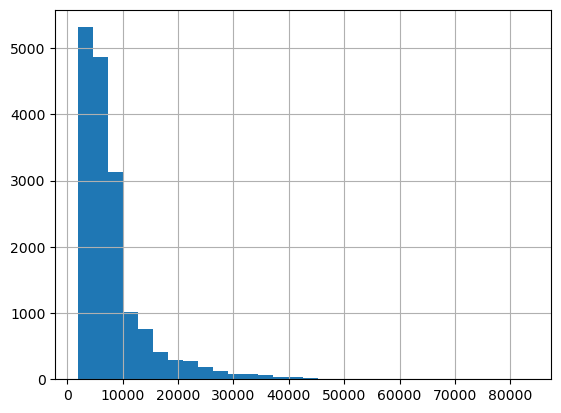

In [181]:
df_loyalty_clean["clv"].hist(bins=30)


<Axes: >

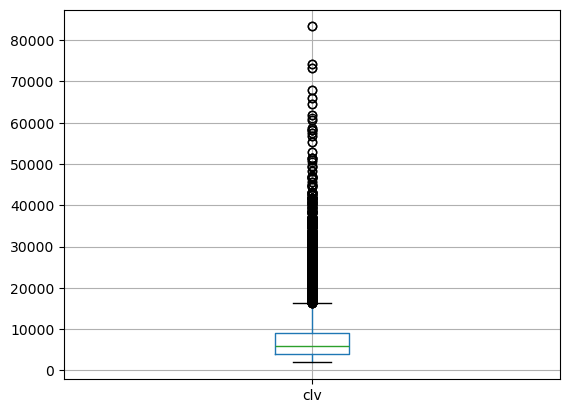

In [182]:
df_loyalty_clean.boxplot(column="clv")


In [183]:
print(df_loyalty_clean["enrollment_type"].isnull().sum())
print(df_loyalty_clean["enrollment_type"].value_counts())


0
enrollment_type
Standard          15766
2018 Promotion      971
Name: count, dtype: int64


In [184]:
print("Nulos en cancellation_year:", df_loyalty_clean["cancellation_year"].isna().sum())
print("Valores únicos:", df_loyalty_clean["cancellation_year"].unique())
print("Cantidad de valores únicos:", df_loyalty_clean["cancellation_year"].nunique())
print("Tipo de dato:", df_loyalty_clean["cancellation_year"].dtype)


Nulos en cancellation_year: 14670
Valores únicos: <IntegerArray>
[<NA>, 2018, 2015, 2017, 2014, 2016, 2013]
Length: 7, dtype: Int64
Cantidad de valores únicos: 6
Tipo de dato: Int64


La variable se mantiene como float por la presencia de nulos. los valores nulos son informativos, ya que no representan un error sino clientes que no han cancelado. Por tanto, deben interpretarse como “activo” y no imputarse. Esta característica permite distinguir entre clientes activos y cancelados, resultando útil para segmentaciones o modelos de predicción de bajas.

In [185]:
df_loyalty_clean["cancellation_year"] = df_loyalty_clean["cancellation_year"].astype("Int64")


In [186]:
print(df_loyalty_clean["cancellation_year"].dtype)
print(df_loyalty_clean["cancellation_year"].unique())


Int64
<IntegerArray>
[<NA>, 2018, 2015, 2017, 2014, 2016, 2013]
Length: 7, dtype: Int64


Ahora los años aparecen como enteros (2013, 2014) y los nulos como <NA>.Se convierte a tipo Int64 porque permite almacenar valores enteros junto con nulos de forma clara. Esto mejora la legibilidad (sin decimales innecesarios) sin alterar el análisis ni el conteo de nulos.

In [187]:
print("Nulos en cancellation_month:", df_loyalty_clean["cancellation_month"].isna().sum())
print("Valores únicos:", df_loyalty_clean["cancellation_month"].unique())
print("Cantidad de valores únicos:", df_loyalty_clean["cancellation_month"].nunique())
print("Tipo de dato:", df_loyalty_clean["cancellation_month"].dtype)


Nulos en cancellation_month: 14670
Valores únicos: <IntegerArray>
[<NA>, 1, 12, 4, 2, 7, 11, 5, 6, 10, 8, 9, 3]
Length: 13, dtype: Int64
Cantidad de valores únicos: 12
Tipo de dato: Int64


cancellation_month presenta 14 670 nulos, que corresponden a clientes que no han cancelado, por lo que estos valores deben interpretarse como “activo” y no imputarse. Los 2 067 registros restantes contienen valores entre 1 y 12, que indican el mes en que se produjo la baja. La variable es consistente, refleja información temporal relevante y, al igual que cancellation_year, los nulos son informativos y útiles para diferenciar entre clientes activos y cancelados.

#Uno los dos dataframe en un merge inner para que devuelva unicamente los clientes que aparecen en ambos datasets por la columna loyalty_number.

In [205]:
df_master = pd.merge(
    df_flight_clean, 
    df_loyalty_clean, 
    on="loyalty_number",   # columna común en ambos
    how="inner"            # inner: solo clientes que están en ambos datasets
)


In [206]:
print(df_master.shape)
print(df_master.head())


(405624, 23)
   loyalty_number  year  month  flights_booked  flights_with_companions  \
0          100018  2017      1               3                        0   
1          100102  2017      1              10                        4   
2          100140  2017      1               6                        0   
3          100214  2017      1               0                        0   
4          100272  2017      1               0                        0   

   total_flights  distance  points_accumulated  points_redeemed  \
0              3      1521               152.0                0   
1             14      2030               203.0                0   
2              6      1200               120.0                0   
3              0         0                 0.0                0   
4              0         0                 0.0                0   

   dollar_cost_points_redeemed  ... education   salary marital_status  \
0                            0  ...  Bachelor  92552.0      

In [207]:
print(df_master.shape)                # dimensiones
print(df_master.isnull().sum())       # nulos por columna
print(df_master.duplicated().sum())   # duplicados completos


(405624, 23)
loyalty_number                      0
year                                0
month                               0
flights_booked                      0
flights_with_companions             0
total_flights                       0
distance                            0
points_accumulated                  0
points_redeemed                     0
dollar_cost_points_redeemed         0
province                            0
city                                0
gender                              0
education                           0
salary                              0
marital_status                      0
loyalty_card                        0
clv                                 0
enrollment_type                     0
enrollment_year                     0
enrollment_month                    0
cancellation_year              355560
cancellation_month             355560
dtype: int64
1864


Fase 2: Visualización
¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


In [211]:
flights_by_month = (df_master.groupby(["year", "month"])["flights_booked"].sum().reset_index())
print(flights_by_month)

    year  month  flights_booked
0   2017      1           47766
1   2017      2           47691
2   2017      3           64271
3   2017      4           55720
4   2017      5           65279
5   2017      6           80493
6   2017      7           89288
7   2017      8           78692
8   2017      9           63304
9   2017     10           60351
10  2017     11           56905
11  2017     12           77650
12  2018      1           49170
13  2018      2           48643
14  2018      3           66928
15  2018      4           56791
16  2018      5           76891
17  2018      6           92749
18  2018      7          104143
19  2018      8           90512
20  2018      9           73075
21  2018     10           69110
22  2018     11           65345
23  2018     12           88397


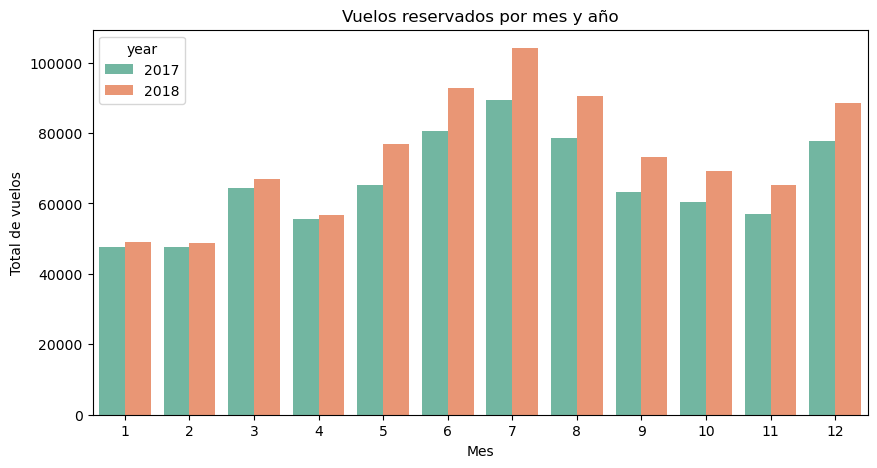

In [ ]:
#Grafico de barras agrupadas que le va mejor a las variables numerica+temporales.


plt.figure(figsize=(10,5))
sns.barplot(x="month", y="flights_booked", hue="year", data=flights_by_month,palette="Set2")
plt.title("Vuelos reservados por mes y año")
plt.xlabel("Mes")
plt.ylabel("Total de vuelos")
plt.show()